# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Car details v3.csv')

In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [7]:
df.shape

(8128, 13)

In [6]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,8128.0,2013.804011,4.044249,1983.0,2011.0,2015.0,2017.0,2020.0
selling_price,8128.0,638271.807702,806253.403508,29999.0,254999.0,450000.0,675000.0,10000000.0
km_driven,8128.0,69819.510827,56550.554958,1.0,35000.0,60000.0,98000.0,2360457.0
seats,7907.0,5.416719,0.959588,2.0,5.0,5.0,5.0,14.0


In [12]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

# Data Preprocessing and Cleaning

In [13]:
# droping duplicates
df=df.dropna()
df=df.drop_duplicates()
# removing unneccesary columns
df = df[df["owner"] != "Test Drive Car"]
df.reset_index(drop=True, inplace=True)


In [14]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [15]:
# checking null value
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [17]:
df.shape

(6712, 13)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6712 entries, 0 to 6711
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6712 non-null   object 
 1   year           6712 non-null   int64  
 2   selling_price  6712 non-null   int64  
 3   km_driven      6712 non-null   int64  
 4   fuel           6712 non-null   object 
 5   seller_type    6712 non-null   object 
 6   transmission   6712 non-null   object 
 7   owner          6712 non-null   object 
 8   mileage        6712 non-null   object 
 9   engine         6712 non-null   object 
 10  max_power      6712 non-null   object 
 11  torque         6712 non-null   object 
 12  seats          6712 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 681.8+ KB


In [27]:
# Checking values in each categories 
(print(df["fuel"].value_counts()))
print("______________________")
print(df["seller_type"].value_counts())
print("______________________")

print(df["transmission"].value_counts())
print("______________________")

print(df["owner"].value_counts())

Diesel    3657
Petrol    2969
CNG         51
LPG         35
Name: fuel, dtype: int64
______________________
Individual          6024
Dealer               661
Trustmark Dealer      27
Name: seller_type, dtype: int64
______________________
Manual       6141
Automatic     571
Name: transmission, dtype: int64
______________________
First Owner             4176
Second Owner            1888
Third Owner              493
Fourth & Above Owner     155
Name: owner, dtype: int64


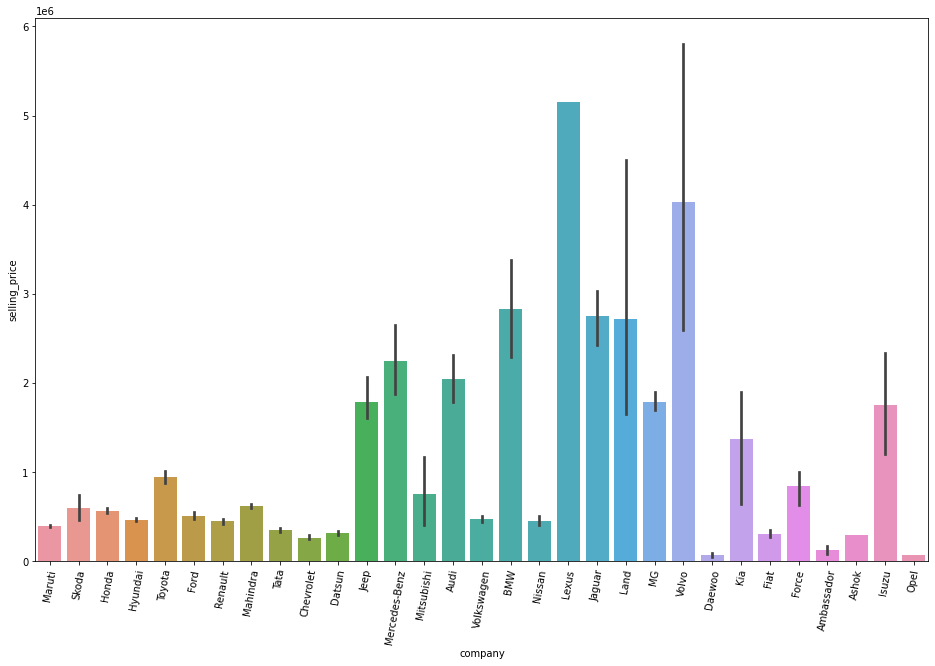

In [32]:
# Getting Company Name from Name of the Car
name = df["name"]
names = []

for i in range(len(name)):
    c = str(name[i]).split(" ")[0]
    names.append(c)
    
df["company"] = pd.DataFrame(names)

plt.figure(figsize = (16,10))
plot = sns.barplot(y='selling_price', x='company', data=df)
plt.setp(plot.get_xticklabels(), rotation=80)
plt.show()

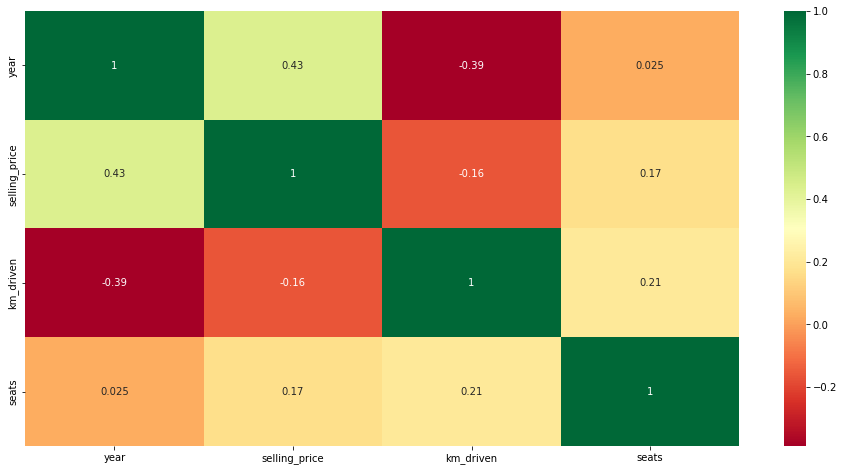

In [34]:
# Heat Map 
plt.figure(figsize = (16,8))
sns.heatmap(df[df.columns].corr(), annot = True, cmap = "RdYlGn")
plt.show()